<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/Modelo-GPR/codigo_modelo_gpr_catole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise por Regressão por Processos Gaussianos para o bairro do Catolé

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, ExpSineSquared, DotProduct, Matern

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
%cd /content/drive/MyDrive/Notebooks_Doutorado/base-campina/

!ls

/content/drive/MyDrive/Notebooks_Doutorado/base-campina
dataset_Amazonas_usableData.csv
dataset_Bodocongo_usable.csv
dataset_Brasil_usableData.csv
dataset_CampinaGrande_casos_acumulados_usable.csv
dataset_CampinaGrande_casos_diarios_usable.csv
dataset_CampinaGrande_usableData.csv
dataset_Catole_usable.csv
dataset_Malvinas_usable.csv
dataset_Paraiba_usableData.csv
dataset_Pernambuco_usableData.csv


In [6]:
file_path = "./dataset_Catole_usable.csv"
casosCatole = pd.read_csv(file_path, encoding='latin1')
casosCatole

,Data,Estado,Cidade,Teste,Resultado,Evolucao,Data PCR,Conclusao,Data Encerramento,Classificacao Final,...,Sexo,Cidade Residencia,Data Nascimento,CEP,Bairro,cum_casos,cep,cep_valido,lat,long
0,2020-03-23,Paraíba,Campina Grande,RT-PCR,Positivo,Cura,23/3/2020,Concluído,25/8/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,24/6/1976,58.446-000,CATOLE,33,58446000,True,-7.229075,-35.880834
1,2020-04-14,Paraíba,Campina Grande,RT-PCR,Positivo,Cura,14/4/2020,Concluído,27/7/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,12/7/1992,58.410-235,CATOLE,51,58410235,True,-7.233249,-35.881792
2,2020-04-23,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,23/4/2020,Concluído,27/8/2020,Confirmado Laboratorial,...,Feminino,Campina Grande,1/5/1982,58.410-235,CATOLE,99,58410235,True,-7.233249,-35.881792
3,2020-04-24,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cancelado,24/4/2020,Concluído,NaN,NaN,...,Feminino,Campina Grande,12/7/1992,58.410-235,CATOLE,104,58410235,True,-7.233249,-35.881792
4,2020-05-02,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,2/5/2020,Concluído,6/8/2020,Confirmado Laboratorial,...,Masculino,Campina Grande,29/9/1985,58.410-370,CATOLE,152,58410370,True,-7.235099,-35.880562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,2021-06-26,Paraíba,Campina Grande,TESTE RÁPIDO - ANTÍGENO,Positivo,NaN,26/6/2021,Concluído,NaN,NaN,...,Masculino,Campina Grande,16/5/1972,58.410-143,CATOLE,34659,58410143,True,-7.232170,-35.874501
1323,2021-06-26,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,Cura,26/6/2021,Concluído,30/6/2021,Confirmado Laboratorial,...,Masculino,Campina Grande,9/10/1957,58.400-010,CATOLE,34660,58400010,True,-7.217840,-35.884345
1324,2021-06-26,Paraíba,Campina Grande,TESTE RÁPIDO - ANTÍGENO,Positivo,NaN,26/6/2021,Concluído,NaN,NaN,...,Masculino,Campina Grande,17/1/1977,58.410-370,CATOLE,34669,58410370,True,-7.235099,-35.880562
1325,2021-06-29,Paraíba,Campina Grande,TESTE RÁPIDO - ANTICORPO,Positivo,NaN,29/6/2021,Concluído,NaN,NaN,...,Feminino,Campina Grande,5/2/1995,58.400-010,CATOLE,34807,58400010,True,-7.217840,-35.884345


In [7]:
casosDiariosCatole = casosCatole['Data'].value_counts(sort=False)
casosAcumuladosCatole = casosDiariosCatole.cumsum()
casosAcumuladosCatole

2020-03-23       1
2020-04-14       2
2020-04-23       3
2020-04-24       4
2020-05-02       6
              ... 
2021-06-23    1317
2021-06-25    1322
2021-06-26    1325
2021-06-29    1326
2021-06-30    1327
Name: Data, Length: 338, dtype: int64

In [8]:
datasCatole = casosCatole['Data'].unique()
casosAcumuladosCatole = casosAcumuladosCatole.tolist()
dfCatole = pd.DataFrame(datasCatole, columns=['Data'])
dfCasosCatole = pd.DataFrame(casosAcumuladosCatole, columns=['Casos_Acumulados'])
dfCatole['Casos_Acumulados'] = dfCasosCatole['Casos_Acumulados']
dfCatole

,Data,Casos_Acumulados
0,2020-03-23,1
1,2020-04-14,2
2,2020-04-23,3
3,2020-04-24,4
4,2020-05-02,6
...,...,...
333,2021-06-23,1317
334,2021-06-25,1322
335,2021-06-26,1325
336,2021-06-29,1326


# Visualização dos Dataset de número de casos acumulados

Text(0.5, 0, 'Dia')

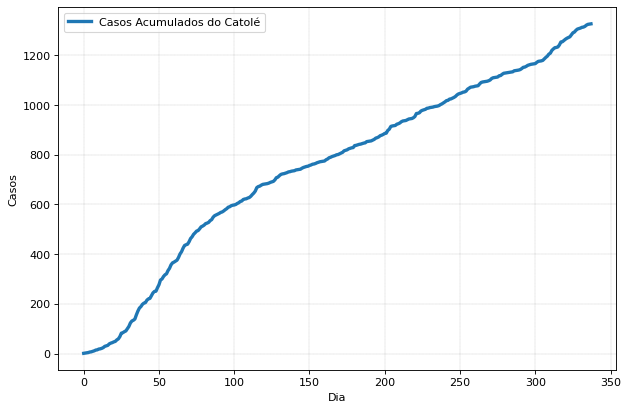

In [10]:
data = np.array(dfCatole.Casos_Acumulados.values)
data = data.reshape(-1, 1)

CRdata = data/1000
CRdata  = np.ravel(CRdata)

plt.figure(2, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data, linewidth = 3)
plt.legend(['Casos Acumulados do Catolé'])
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.ylabel('Casos')
plt.xlabel('Dia')

Dataset de teste

In [11]:
trainL = len(CRdata) - 30

t = np.linspace(1,len(CRdata),len(CRdata))
t = t.reshape(len(t),1)
t = np.atleast_2d(t)

t_tr  = t[0:trainL]
t_test = t[trainL:]

CR_tr = CRdata[0:trainL]
CR_test = CRdata[trainL:]

In [12]:
def half_data(data, time):
    half_data = []
    half_time = []
    for i,item in enumerate(data):
        if i%2 == 0:
            half_data.append(item)
            half_time.append(time[i])

    return np.array(half_data), np.array(half_time)

Modelagem

In [13]:
def GPR_Model(CR_tr, t_tr, CR_test, t_test):

    t = np.append(t_tr, t_test).reshape(-1,1)
    CRdata = np.append(CR_tr, CR_test)

    #kernel = ConstantKernel()* Matern(1.0)*RBF() + DotProduct()
    kernel = ConstantKernel()*RBF()*DotProduct(sigma_0 = 0)*ConstantKernel(constant_value= 0.005)
    # kernel = RBF()
    # kernel = Matern()

    model  = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha = 10, normalize_y=False)

    model.fit(t_tr, CR_tr)
    print("\nLearned kernel: %s" % model.kernel_)
    params = model.kernel_.get_params()

    R2_tr  = model.score(t_tr, CR_tr)
    R2     = model.score(t, CRdata)
    R2_test = model.score(t_test, CR_test)

    CRpred_tr, sigma_tr = model.predict(t_tr, return_std=True)
    CRpred_test, sigma_test = model.predict(t_test, return_std=True)
    CRpred, sigma   = model.predict(t, return_std=True)

    MSE = np.mean(((CRpred_tr-CR_tr)*1000)**2)
    print("\nMSE: %f" % MSE)
    print("\nSTD: %f" % np.sqrt(MSE))
    print("\nR2 treinamento: %f" % R2_tr)
    print("\nR2 todo intervalo de dados: %f" % R2)
    print("\nR2 de teste: %f" % R2_test)

    return CRpred_tr, sigma_tr, CRpred_test, sigma_test, CRpred, sigma, t, CRdata

In [14]:
CRpred_tr, sigma_tr, CRpred_test, sigma_test, CRpred, sigma, t, CRdata = GPR_Model(CR_tr, t_tr, CR_test, t_test)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))



Learned kernel: 1.34**2 * RBF(length_scale=1e+05) * DotProduct(sigma_0=1.08e-05) * 0.00316**2

MSE: 11055.794084

STD: 105.146536

R2 treinamento: 0.906866

R2 todo intervalo de dados: 0.922356

R2 de teste: -1.577159


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [15]:
def plot_gpr(CRdata, CRpred, sigma, t):
    plt.figure(1, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    mpl.style.use('default')
    plt.plot(t, CRdata*1000, 'ko', markersize=3, mfc='none', linewidth=1, label=r'Casos acumulados Catolé')
    plt.axvline(x = t_test[0],linestyle= '--', color = 'black')
    plt.plot(t, CRpred*1000, 'b-', label='Previsão via modelo GPR', linewidth = 3)
    plt.fill(np.concatenate([t, t[::-1]]),
            np.concatenate([CRpred*1000 - 1.9600 * 1000*sigma,
                            (CRpred*1000 + 1.9600 * 1000*sigma)[::-1]]),
            alpha=.25, fc='b', ec='None', label='intervalo de confiança de 95%')
    plt.legend(loc='upper left', fontsize = 14)
    plt.grid(color='k', linestyle='--', linewidth=0.1)
    plt.ylabel('Total de casos', fontsize = 14)
    plt.xlabel('dia', fontsize = 14)
    plt.title('COVID-CG Casos Acumulados', fontsize = 14)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

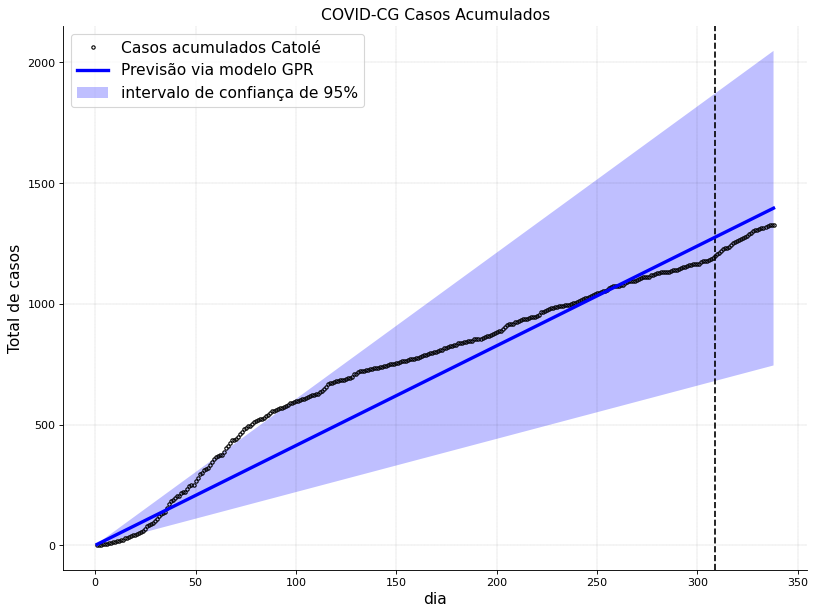

In [16]:
plot_gpr(CRdata, CRpred, sigma, t)

Análise para 50% dos dados

In [17]:
CR_tr_half,t_tr_half = half_data(CR_tr, t_tr)
CRpred_tr_half, sigma_tr_half, CRpred_test_half, sigma_test_half, CRpred_half, sigma_half, t_half, CRdata_half = GPR_Model(CR_tr_half, t_tr_half, CR_test, t_test)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))



Learned kernel: 0.0303**2 * RBF(length_scale=1e+05) * DotProduct(sigma_0=1e-05) * 0.136**2

MSE: 16269.313332

STD: 127.551218

R2 treinamento: 0.863481

R2 todo intervalo de dados: 0.905468

R2 de teste: 0.874360


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


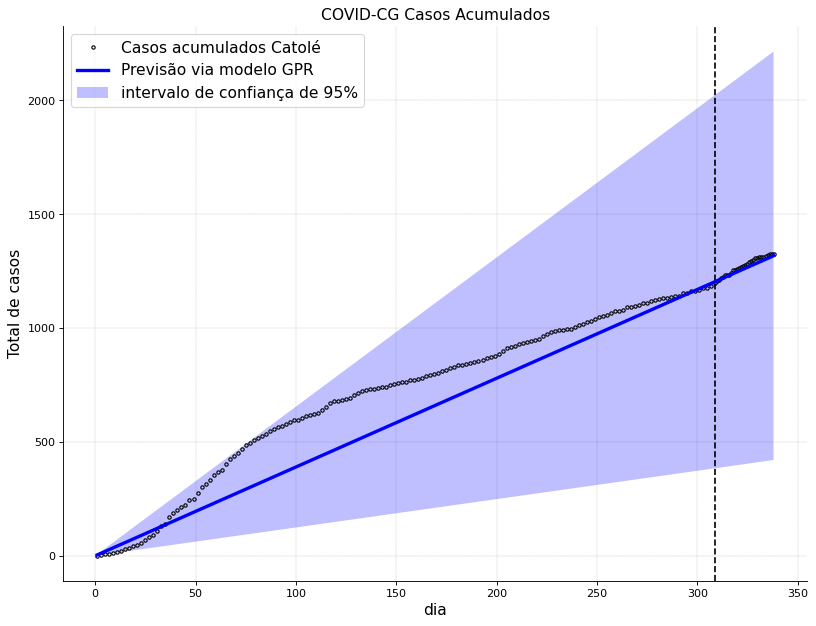

In [18]:
plot_gpr(CRdata_half, CRpred_half, sigma_half, t_half)

Análise para 1/4 dos dados

In [19]:
CR_tr_quarter,t_tr_quarter = half_data(CR_tr_half, t_tr_half)
CRpred_tr_quarter, sigma_tr_quarter, CRpred_test_quarter, sigma_test_quarter, CRpred_quarter, sigma_quarter, t_quarter, CRdata_quarter = GPR_Model(CR_tr_quarter, t_tr_quarter, CR_test, t_test)


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))



Learned kernel: 0.0989**2 * RBF(length_scale=1e+05) * DotProduct(sigma_0=4.08e-05) * 0.0391**2

MSE: 37354.583938

STD: 193.273340

R2 treinamento: 0.689051

R2 todo intervalo de dados: 0.775062

R2 de teste: -16.077149


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


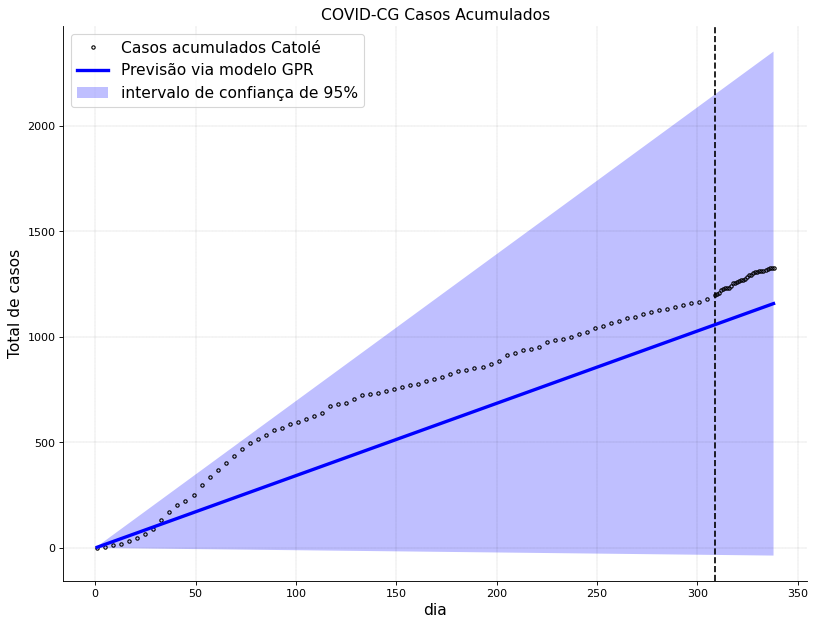

In [20]:
plot_gpr(CRdata_quarter, CRpred_quarter, sigma_quarter, t_quarter)